In [5]:
import numpy as np
import pandas as pd
from datetime import datetime
import time


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from binance1.client import Client
from keys import api_key, api_secret

In [16]:

client = Client(api_key, api_secret)

In [17]:
klines = client.get_historical_klines("BNBBTC", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")



In [18]:
#get today prices
prices = client.get_all_tickers()
for e in prices:
    e['price' + str(datetime.date(datetime.now()))] = e['price']
    del e['price']


In [19]:
#filter only USDT pairs
USDT_pairs = [e for e in prices if e['symbol'].endswith("USDT")]


In [20]:
#get prices june 1590994800 test
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1WEEK, "1 Jun, 2020")
#candles = client.get_klines(symbol='BNBBTC', startTime=1590994800, endTime=1590994861, interval=Client.KLINE_INTERVAL_1MINUTE)

In [21]:
dict_ = {
    "open_time":klines[0][0],
    "Open":klines[0][1],
    "High":klines[0][2],
    "Low":klines[0][3],
    "close":klines[0][4],
    "volume":klines[0][5],
    "close_time":klines[0][6],
}


In [22]:
for k,v in dict_.items():
    print(f"{k}: {v}")

open_time: 1590969600000
Open: 9448.27000000
High: 10380.00000000
Low: 9266.00000000
close: 9746.99000000
volume: 427822.49534700
close_time: 1591574399999


In [25]:
# now generate list of all USDT pairs of hight values
print("starting")
for e in USDT_pairs:
    val_ = None
    try:
        val_ = client.get_historical_klines(e['symbol'], Client.KLINE_INTERVAL_1WEEK, "1 Jun, 2020")[0]
        #print(e, len(val_), end=" ")
        val_ = val_[2]
        #print(val_)
    except IndexError:
        val_ = None
    e['price2020-06-01'] = val_
print("done")

starting
done


In [26]:
df = pd.DataFrame(USDT_pairs)

In [27]:
#drop None 
df_clean = df.dropna(0)


In [59]:
df_clean

,symbol,price2021-01-17,price2020-06-01,price_change,compare_to_btc
1,ETHUSDT,1209.05000000,253.800,0.0,-inf
2,BNBUSDT,41.90970000,18.200,0.0,-inf
4,NEOUSDT,22.89900000,13.200,0.0,-inf
5,LTCUSDT,141.20000000,49.960,0.0,-inf
6,QTUMUSDT,2.97000000,1.924,0.0,-inf
...,...,...,...,...,...
248,ATMUSDT,5.14200000,36.000,0.0,-inf
249,ASRUSDT,4.33100000,29.880,0.0,-inf
250,CELOUSDT,2.04800000,4.120,0.0,-inf
251,RIFUSDT,0.18790000,0.500,0.0,-inf


In [60]:
#convert all to numeric
df['price2021-01-17'] = pd.to_numeric(df['price2021-01-17'])
df['price2020-06-01'] = pd.to_numeric(df['price2020-06-01'])


In [61]:
df_clean

,symbol,price2021-01-17,price2020-06-01,price_change,compare_to_btc
1,ETHUSDT,1209.05000000,253.800,0.0,-inf
2,BNBUSDT,41.90970000,18.200,0.0,-inf
4,NEOUSDT,22.89900000,13.200,0.0,-inf
5,LTCUSDT,141.20000000,49.960,0.0,-inf
6,QTUMUSDT,2.97000000,1.924,0.0,-inf
...,...,...,...,...,...
248,ATMUSDT,5.14200000,36.000,0.0,-inf
249,ASRUSDT,4.33100000,29.880,0.0,-inf
250,CELOUSDT,2.04800000,4.120,0.0,-inf
251,RIFUSDT,0.18790000,0.500,0.0,-inf


In [62]:
#add change in price colmn as a percantage
df_clean['price_change'] = (df["price2021-01-17"] - df["price2020-06-01"]) / df["price2020-06-01"] * 100


<ipython-input-62-d4cb1a993044>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price_change'] = (df["price2021-01-17"] - df["price2020-06-01"]) / df["price2020-06-01"] * 100


In [63]:
df_clean.head(10)

,symbol,price2021-01-17,price2020-06-01,price_change,compare_to_btc
1,ETHUSDT,1209.05000000,253.80000,376.379039,-inf
2,BNBUSDT,41.90970000,18.20000,130.273077,-inf
4,NEOUSDT,22.89900000,13.20000,73.477273,-inf
5,LTCUSDT,141.20000000,49.96000,182.626101,-inf
6,QTUMUSDT,2.97000000,1.92400,54.365904,-inf
7,ADAUSDT,0.36565000,0.09039,304.524837,-inf
8,XRPUSDT,0.27344000,0.21470,27.359106,-inf
9,EOSUSDT,2.72120000,2.89390,-5.967725,-inf
10,TUSDUSDT,1.00020000,1.00190,-0.169678,-inf
11,IOTAUSDT,0.41200000,0.25850,59.381044,-inf


In [64]:
btc_price_change = 240.958574

In [65]:
# add comparison to btc growth
df_clean["compare_to_btc"] = (df_clean["price_change"] - btc_price_change) / df_clean["price_change"] *100
df_clean["compare_to_btc"] = df_clean["compare_to_btc"].round(2)

<ipython-input-65-9d248949d50d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["compare_to_btc"] = (df_clean["price_change"] - btc_price_change) / df_clean["price_change"] *100
<ipython-input-65-9d248949d50d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["compare_to_btc"] = df_clean["compare_to_btc"].round(2)


In [69]:
df_clean

,symbol,price2021-01-17,price2020-06-01,price_change,compare_to_btc
1,ETHUSDT,1209.05000000,253.800,376.379039,35.98
2,BNBUSDT,41.90970000,18.200,130.273077,-84.96
4,NEOUSDT,22.89900000,13.200,73.477273,-227.94
5,LTCUSDT,141.20000000,49.960,182.626101,-31.94
6,QTUMUSDT,2.97000000,1.924,54.365904,-343.22
...,...,...,...,...,...
248,ATMUSDT,5.14200000,36.000,-85.716667,381.11
249,ASRUSDT,4.33100000,29.880,-85.505355,381.81
250,CELOUSDT,2.04800000,4.120,-50.291262,579.13
251,RIFUSDT,0.18790000,0.500,-62.420000,486.03


In [72]:
# df_clean.drop(labels=10,inplace=True)
# df_clean.drop(labels=0,inplace=True)
df_clean.head(10)

,symbol,price2021-01-17,price2020-06-01,price_change,compare_to_btc
1,ETHUSDT,1209.05000000,253.80000,376.379039,35.98
2,BNBUSDT,41.90970000,18.20000,130.273077,-84.96
4,NEOUSDT,22.89900000,13.20000,73.477273,-227.94
5,LTCUSDT,141.20000000,49.96000,182.626101,-31.94
6,QTUMUSDT,2.97000000,1.92400,54.365904,-343.22
7,ADAUSDT,0.36565000,0.09039,304.524837,20.87
8,XRPUSDT,0.27344000,0.21470,27.359106,-780.73
9,EOSUSDT,2.72120000,2.89390,-5.967725,4137.70
11,IOTAUSDT,0.41200000,0.25850,59.381044,-305.78
12,XLMUSDT,0.29750000,0.08631,244.687753,1.52


In [71]:
df_clean.sort_values(by='compare_to_btc', axis=0)

,symbol,price2021-01-17,price2020-06-01,price_change,compare_to_btc
173,RSRUSDT,0.03925000,0.038500,1.948052,-12269.21
89,TROYUSDT,0.00379150,0.003719,1.963157,-12174.03
101,BTSUSDT,0.02506000,0.024430,2.578797,-9243.84
26,BTTUSDT,0.00034960,0.000340,2.853781,-8343.49
15,ETCUSDT,7.58280000,7.319500,3.597240,-6598.43
...,...,...,...,...,...
23,USDCUSDT,0.99990000,1.003000,-0.309073,78061.76
233,XEMUSDT,0.21660000,0.217200,-0.276243,87327.00
73,BUSDUSDT,1.00020000,1.001700,-0.149745,161012.14
20,PAXUSDT,1.00010000,1.001300,-0.119844,201159.85


In [79]:
df_clean.to_json('17.01.2021.json')

/home/uru/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'In bin')

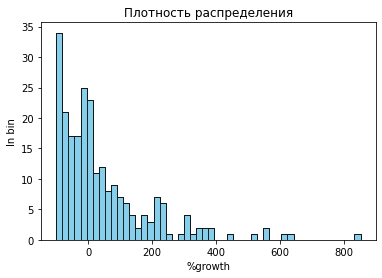

In [74]:
# matplotlib histogram
plt.hist(df_clean['price_change'], color = 'skyblue', edgecolor = 'black',
         bins = 50)

# seaborn histogram
sns.distplot(df_clean['price_change'], hist=True, kde=False, 
             bins=50, color = 'skyblue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Плотность распределения')
plt.xlabel('%growth')
plt.ylabel('In bin')

## TO btc growth comparison

Text(0, 0.5, 'y')

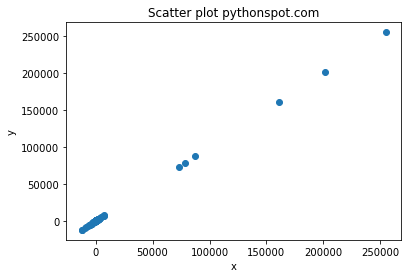

In [75]:

# Plot
plt.scatter(df_clean["compare_to_btc"],df_clean["compare_to_btc"])
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')

In [76]:
# clean outliers
df_no_outlier = df_clean[df_clean['price_change'] < 400]
df_no_outlier = df_no_outlier[df_no_outlier['price_change'] > 0]

In [77]:
df_no_outlier

,symbol,price2021-01-17,price2020-06-01,price_change,compare_to_btc
1,ETHUSDT,1209.05000000,253.800,376.379039,35.98
2,BNBUSDT,41.90970000,18.200,130.273077,-84.96
4,NEOUSDT,22.89900000,13.200,73.477273,-227.94
5,LTCUSDT,141.20000000,49.960,182.626101,-31.94
6,QTUMUSDT,2.97000000,1.924,54.365904,-343.22
...,...,...,...,...,...
226,AXSUSDT,0.61001000,0.290,110.348276,-118.36
232,AVAUSDT,1.34310000,1.050,27.914286,-763.21
234,AAVEUPUSDT,55.29600000,16.449,236.166332,-2.03
238,SUSHIUPUSDT,33.05000000,11.530,186.643539,-29.10


/home/uru/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'In bin')

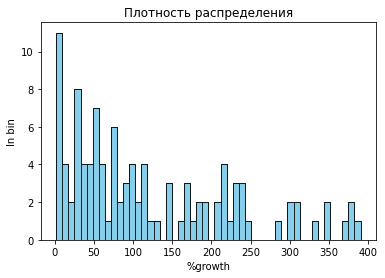

In [78]:
# matplotlib histogram
plt.hist(df_no_outlier['price_change'], color = 'skyblue', edgecolor = 'black',
         bins = 50)

# seaborn histogram
sns.distplot(df_no_outlier['price_change'], hist=True, kde=False, 
             bins=50, color = 'skyblue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Плотность распределения')
plt.xlabel('%growth')
plt.ylabel('In bin')